# MLHW2 - k-NN

### Question 1

In [1]:
import numpy as np

a = "polytechnique"
b = "polycopie"

def edit_dist(a, b):
    n, m = len(a), len(b)
    A = np.zeros((n+1, m+1), dtype=int) # creating a 2-d array to store the sub-problems, default type is float but we will only be working with integers and output doesn't look too good with points
    # Initialization
    for i in range(n+1):
        A[i,0] = i # if a is empty
    for j in range(m+1):
        A[0,j] = j # if b is empty
    for i in range(1, n+1):
        for j in range(1, m+1):
            if a[i-1] == b[j-1]: # if current characters are the same, the distance will be the same as the previous step
                A[i,j] = A[i-1, j-1]
            else: # if they are different, we take the minimum between the 3 possible operations, which all require +1 change
                A[i,j] = 1 + min(A[i-1, j-1], A[i, j-1], A[i-1, j])
    
    print(f"The edit distance between {a} and {b} is: {A[i][j]}.\n")
    return A

print(edit_dist(a, b))
        

The edit distance between polytechnique and polycopie is: 6.

[[ 0  1  2  3  4  5  6  7  8  9]
 [ 1  0  1  2  3  4  5  6  7  8]
 [ 2  1  0  1  2  3  4  5  6  7]
 [ 3  2  1  0  1  2  3  4  5  6]
 [ 4  3  2  1  0  1  2  3  4  5]
 [ 5  4  3  2  1  1  2  3  4  5]
 [ 6  5  4  3  2  2  2  3  4  4]
 [ 7  6  5  4  3  2  3  3  4  5]
 [ 8  7  6  5  4  3  3  4  4  5]
 [ 9  8  7  6  5  4  4  4  5  5]
 [10  9  8  7  6  5  5  5  4  5]
 [11 10  9  8  7  6  6  6  5  5]
 [12 11 10  9  8  7  7  7  6  6]
 [13 12 11 10  9  8  8  8  7  6]]


### Question 2

In [2]:
import string

# Step 1: Generation of words of n length

def random_word(n, Seed=None):
    if Seed is not None:
        np.random.seed(Seed)  
    return ''.join(np.random.choice(list(string.ascii_lowercase), size=n)) # concatenate n letters picked from a list containing the alphabet

random_word(10, Seed=58439)

'xrehzmndvo'

In [3]:
# Step 2: Computing the edit distance

def edit_dist2(a, b):
    n, m = len(a), len(b)
    A = np.zeros((n+1, m+1), dtype=int) # creating a 2-d array to store the sub-problems, default type is float but we will only be working with integers and output doesn't look too good with points
    # Initialization
    for i in range(n+1):
        A[i,0] = i # if a is empty
    for j in range(m+1):
        A[0,j] = j # if b is empty
    for i in range(1, n+1):
        for j in range(1, m+1):
            if a[i-1] == b[j-1]: # if current characters are the same, the distance will be the same as the previous step
                A[i,j] = A[i-1, j-1]
            else: # if they are different, we take the minimum between the 3 possible operations, which all require +1 change
                A[i,j] = 1 + min(A[i-1, j-1], A[i, j-1], A[i-1, j])
    return A[i,j]

In [4]:
# Step 3: Calculating the average computation time of the algorithm

import time

def calc_time(n, num_words):
    for i in range(num_words):
        word1 = random_word(n)
        word2 = random_word(n)
        start_time = time.time()
        edit_dist2(word1, word2)
        avg_time_taken = time.time() - start_time
    return (avg_time_taken/num_words)

calc_time(10, 1) # just a test that the function works here

5.2928924560546875e-05

In [8]:
avg_times = []
n_values = range(0, 51, 5)

num_words = np.random.randint(10**4, 10**6+1)

for n in n_values:
    avg_time = calc_time(n, num_words)
    avg_times.append(avg_time)
    print(avg_times) # should have put it outside the loop so it doesn't print every time it appends

[1.5542280254339146e-10]
[1.5542280254339146e-10, 2.0826655540814457e-09]
[1.5542280254339146e-10, 2.0826655540814457e-09, 6.123658420209623e-09]
[1.5542280254339146e-10, 2.0826655540814457e-09, 6.123658420209623e-09, 1.1998640356349821e-08]
[1.5542280254339146e-10, 2.0826655540814457e-09, 6.123658420209623e-09, 1.1998640356349821e-08, 2.2163291642687623e-08]
[1.5542280254339146e-10, 2.0826655540814457e-09, 6.123658420209623e-09, 1.1998640356349821e-08, 2.2163291642687623e-08, 3.338481798632048e-08]
[1.5542280254339146e-10, 2.0826655540814457e-09, 6.123658420209623e-09, 1.1998640356349821e-08, 2.2163291642687623e-08, 3.338481798632048e-08, 4.814998422794267e-08]
[1.5542280254339146e-10, 2.0826655540814457e-09, 6.123658420209623e-09, 1.1998640356349821e-08, 2.2163291642687623e-08, 3.338481798632048e-08, 4.814998422794267e-08, 6.636553668602815e-08]
[1.5542280254339146e-10, 2.0826655540814457e-09, 6.123658420209623e-09, 1.1998640356349821e-08, 2.2163291642687623e-08, 3.338481798632048e-0

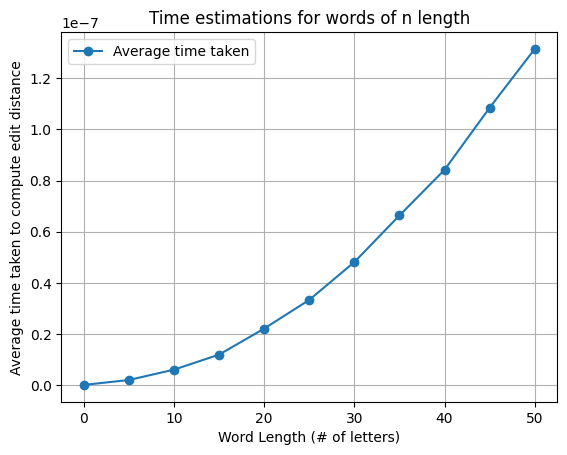

In [9]:
import matplotlib.pyplot as plt

plt.plot(n_values, avg_times, marker='o', label='Average time taken')
plt.title('Time estimations for words of n length')
plt.xlabel('Word Length (# of letters)')
plt.ylabel('Average time taken to compute edit distance')
plt.legend()
plt.grid(True)
plt.show()